# Other Clustering Methods

In [94]:
def plot_circle_regions(X, k, xlim=(-4,4), ylim=(0, 8), cmap='tab10'):

    from scipy.spatial.distance import cdist
    kmeans = KMeans(k).fit(X)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[kmeans.labels_ == i], [center]).max() for i, center in enumerate(centers)]

    fig, ax = plt.subplots(figsize=(12,8))

    ax.scatter(X[:, 0], X[:, 1], s=40, c=kmeans.labels_, cmap=cmap);

    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='b', lw=3, alpha=0.3, zorder=1))

    plt.gca().set_aspect('equal', adjustable='box')

<IPython.core.display.Javascript object>

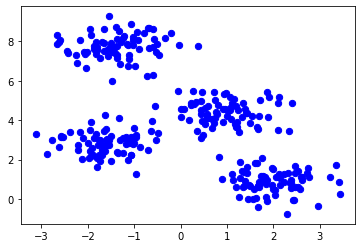

In [96]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans


X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)


plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

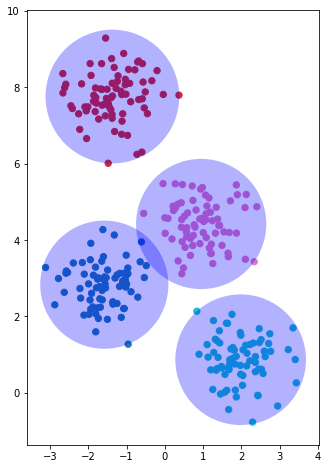

In [97]:
plot_circle_regions(X, 4)

## Gaussian Mixture Models

In [40]:

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

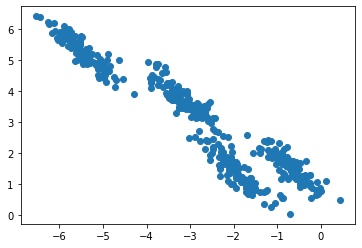

In [43]:
plt.scatter(X_stretched[:,0], X_stretched[:,1])

<IPython.core.display.Javascript object>

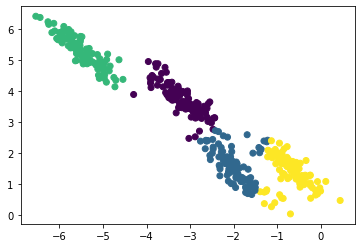

In [45]:
model = KMeans(4)
model.fit(X_stretched)
plt.scatter(X_stretched[:,0], X_stretched[:,1], c=model.labels_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

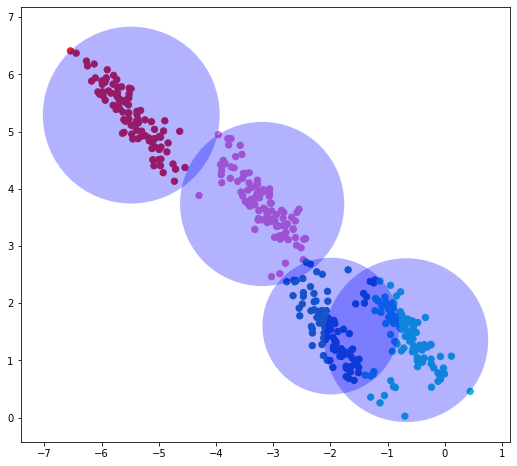

In [42]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_circle_regions(X_stretched, 4)

In [52]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(X_stretched)

GaussianMixture(n_components=4)

In [53]:
labels = gmm.predict(X_stretched)

<IPython.core.display.Javascript object>

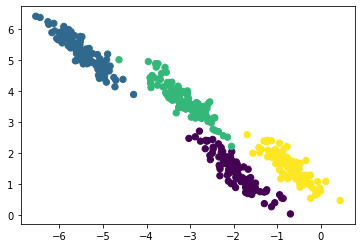

In [54]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
probs  = gmm.predict_proba(X_stretched)

<IPython.core.display.Javascript object>

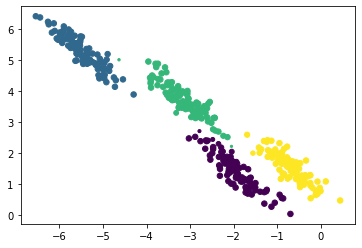

In [81]:
size = 30 * probs.max(1) ** 3  # emphasizes differences
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, cmap='viridis', s=size, marker='o');


## DBScan

<IPython.core.display.Javascript object>

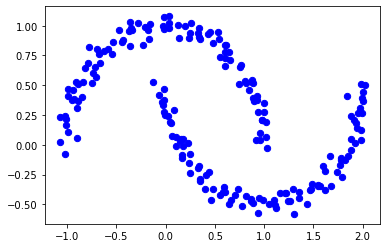

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');

What do we expect the clusters to be?

### Let's use KMeans to predict the clusters

In [9]:
kmeans = KMeans(2, random_state=0)
kmeans.fit(X)

labels = KMeans(2, random_state=0).fit_predict(X)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

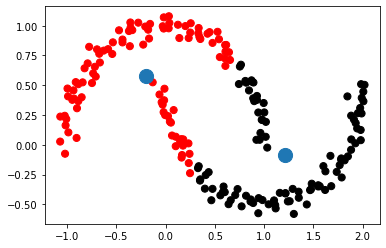

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='flag');
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200);


The KMeans algorithm 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

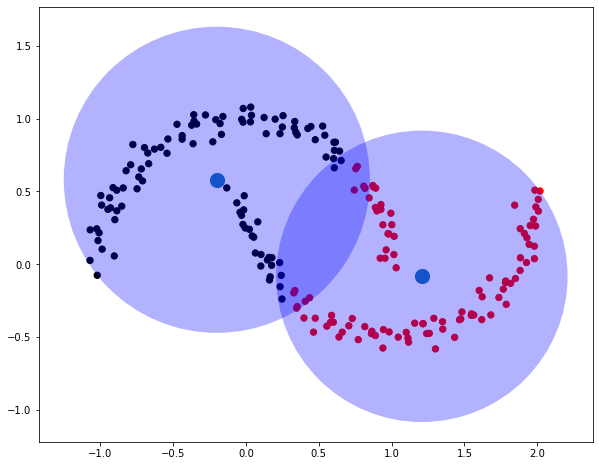

In [11]:
plot_circle_regions(X, 2, xlim=(-2,3), ylim=(-2,3), cmap='flag')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200);

<IPython.core.display.Javascript object>

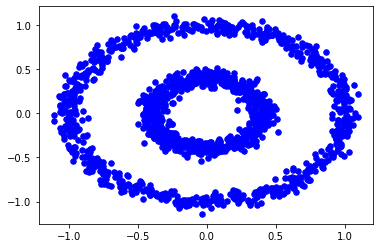

In [12]:
from sklearn.datasets import make_circles

X1, Y1 = make_circles(factor=0.4, noise=0.05, n_samples=1500)

plt.scatter(X1[:, 0], X1[:, 1], s=30, c='blue');

<IPython.core.display.Javascript object>

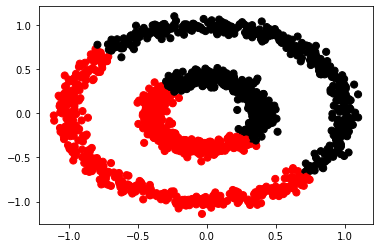

In [13]:
labels = KMeans(2, random_state=0).fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=labels,s=50, cmap='flag');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

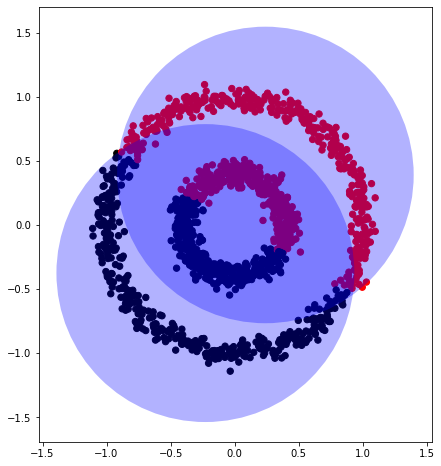

In [14]:
plot_circle_regions(X1, 2, xlim=(-2,2), ylim=(-2,2), cmap='flag')

### DBScan comes to help

A Density based algorithm can be used to start from a random point and `walk` throughout its neighborhood

It basically requires the understanding of 2 parameters:
    1. eps: the mini-radius it will use to look for neighbors.
    2. min_samples: how many points is it needed for it to consider 1 cluster.

**Important Note:**

The DBScan algorithm will **try** to find clusters. If it looks at a neighborhood of a point and doesn't find anyone within range, it will consider it at cluster **-1**, which means **noise** cluster.

https://www.youtube.com/watch?v=h53WMIImUuc

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
db = DBSCAN(eps=0.3, min_samples=10)

In [17]:
db.fit(X1)

DBSCAN(eps=0.3, min_samples=10)

In [18]:
labels = db.fit_predict(X1)

<IPython.core.display.Javascript object>

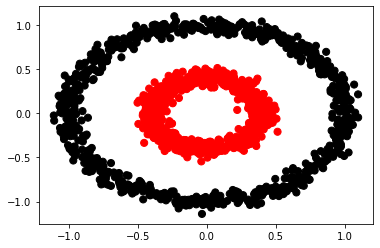

In [19]:
plt.scatter(X1[:, 0], X1[:, 1], c=labels,s=50, cmap='flag');

<IPython.core.display.Javascript object>

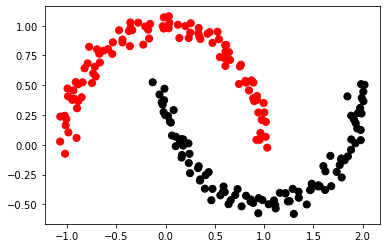

In [20]:
X, y = make_moons(200, noise=.05, random_state=0)

labels = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='flag');

<IPython.core.display.Javascript object>

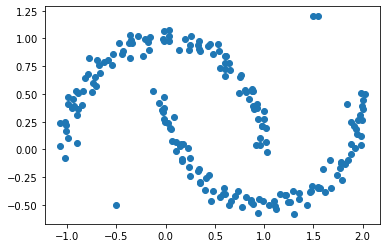

In [21]:
X[199, :] = (1.5, 1.2)
X[198, :] = (1.55, 1.2)
X[197, :] = (-0.5, -0.5)
plt.scatter(X[:, 0], X[:, 1]);

In [22]:
labels

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

<IPython.core.display.Javascript object>

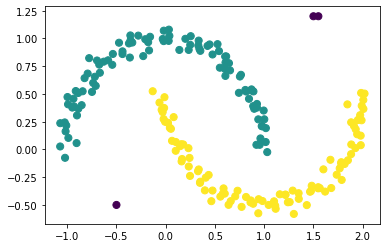

In [37]:
labels = DBSCAN(eps=.3, min_samples=10).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

In [38]:
labels

array([ 0,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,  0,
        1,  0,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,
        1,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,
        0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,
        1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,
        0,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  1, -1, -1, -1], dtype=int64)

In [39]:
labels

array([ 0,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,  0,
        1,  0,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,
        1,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,
        0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,
        1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,
        0,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  1, -1, -1, -1], dtype=int64)

## Hierarchical Clustering

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage

![dendrogram.png](dendrogram.png)

Algorithm:
    - Find closest pair of points.
    - Join them together as a cluster.
    - Repeat

## Linkage concept

We know how to calculate pairwise distances within observations. But what about now that we have to calculate distance from an observation to a group of observations?

- <b>Maximum or complete linkage</b> minimizes the maximum distance between observations of pairs of clusters: 
    - Compute all pairwise distances between observations in cluster A and in cluster B, and record the largest of these distances.
    

- <b>Average linkage</b> minimizes the average of the distances between all observations of pairs of clusters.
    - Compute all pairwise distance between the observations in cluster A and cluster B and record the average of these distances.

- <b>Single linkage</b> minimizes the distance between the closest observations of pairs of clusters.
    - Compute all pairwise distance between the observations in clusterA and cluster B and record the smallest of these distances.
- <b> Ward </b> minimizes the error sum of squares (also known as variance)

In [107]:
df = pd.read_csv('Mall_Customers.csv')

In [123]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [154]:
from sklearn.preprocessing import StandardScaler

In [170]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [238]:
from scipy.spatial.distance import pdist


In [245]:
pdist()

<function scipy.spatial.distance.pdist(X, metric='euclidean', *args, **kwargs)>

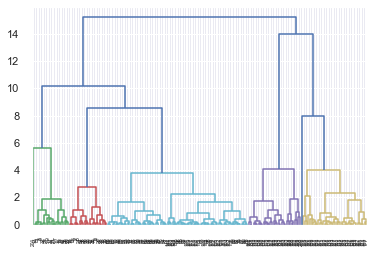

In [235]:
from scipy.cluster import hierarchy
dendrogram = hierarchy.dendrogram(
    hierarchy.linkage(StandardScaler().fit_transform(X), method = 'ward'), color_threshold=6)

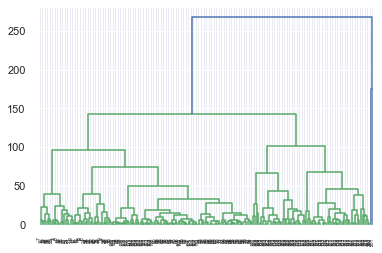

In [251]:
from scipy.cluster import hierarchy
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'complete'), color_threshold=150)

In [171]:
hierarchical = AgglomerativeClustering(5)
hierarchical.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

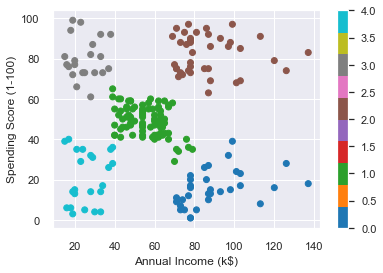

In [193]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=hierarchical.labels_, cmap='tab10')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.colorbar();

In [189]:
df.loc[:, 'cluster'] = hierarchical.labels_

In [191]:
df.groupby('cluster').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,166.250000,41.000000,89.406250,15.593750
1,87.894118,42.482353,55.811765,49.129412
2,162.000000,32.692308,86.538462,82.128205
3,22.000000,25.333333,25.095238,80.047619
4,23.000000,45.217391,26.304348,20.913043


## Application: Outlier Detection

In [203]:
X.loc[200, ['Annual Income (k$)','Spending Score (1-100)']] = (200, 200)

Text(0, 0.5, 'Spending Score (1-100)')

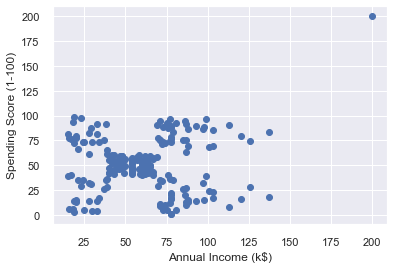

In [204]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], )
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

In [207]:
X.drop('cluster', axis=1, inplace=True)

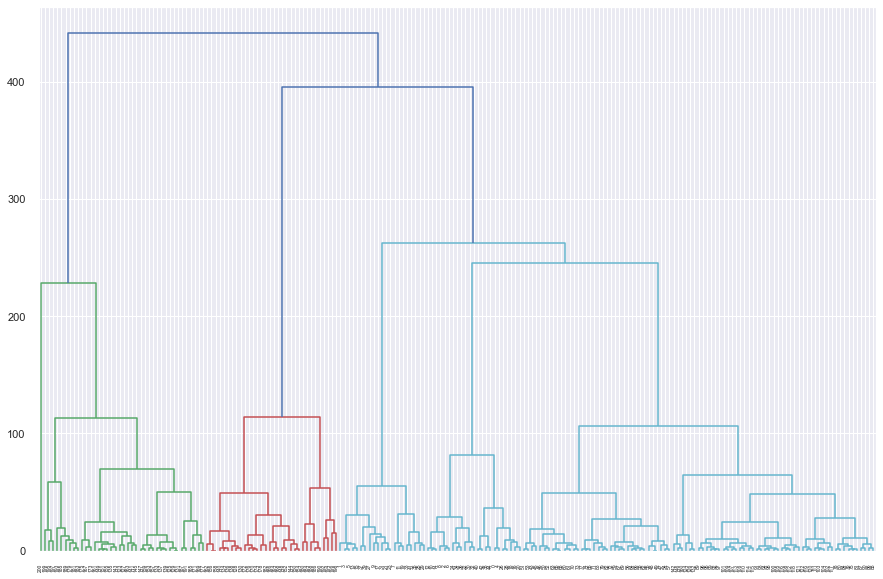

In [210]:
from scipy.cluster import hierarchy
plt.figure(figsize=(15,10))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))

In [212]:
X.loc[201, ['Annual Income (k$)','Spending Score (1-100)']] = (25, 200)

Text(0, 0.5, 'Spending Score (1-100)')

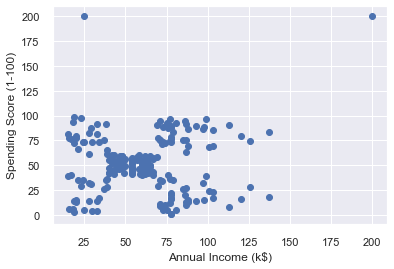

In [219]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], )
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

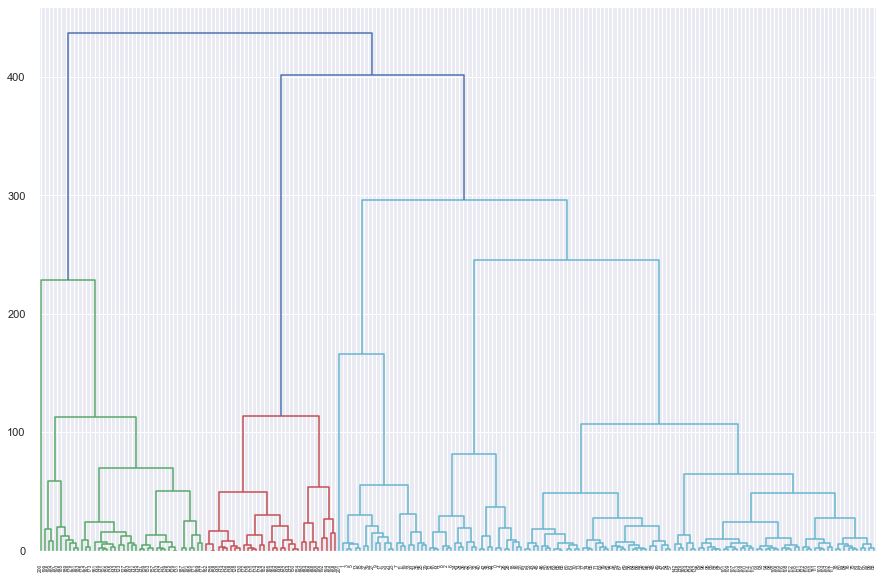

In [213]:
from scipy.cluster import hierarchy
plt.figure(figsize=(15,10))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))

In [217]:
hierarchical = AgglomerativeClustering(7)
hierarchical.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=7)

In [220]:
hierarchical.n_leaves_

202

In [218]:
from collections import Counter

Counter(hierarchical.labels_)

Counter({4: 23, 2: 21, 3: 85, 1: 39, 0: 32, 5: 1, 6: 1})

## Application - Image Compression

The idea is that an image is composed by thousands of colors. If, instead, we select the only colors of a picture to be the centroids of a KMeans clustering, we'll keep the only K colors that best represent the image. 

The idea here is not to show an application for those of you who will work as an image compression in your life. The idea here is to show that this idea is powerful and can be useful in several other sitatuations. For example, you could apply this exactly same rationale to interpret the centroids of a KMeans clustering in a dataset composed by people and its buying patterns. 

The centroids of that dataset will represent the people that best represent those clusters, what we usually call in industry as **personas**. That is, you can consider the characteristics of the centroids of your KMeans as the *personas* of your clients.

<IPython.core.display.Javascript object>

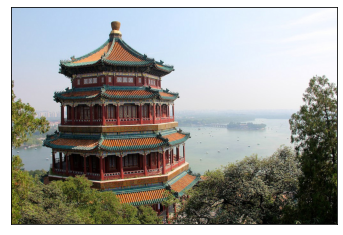

In [98]:
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [261]:
X_std

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [ ]:
china.shape

In [ ]:
len(np.unique(china, axis=0))

In [ ]:
data = china / 255.0 # use 0...1 scale

In [ ]:
np.unique(np.array([[1,2,3],
 [1,2,3],
 [1,2,3],
 [7,9,13]]), axis=0)

In [ ]:
len(np.unique(data, axis=0))

In [ ]:

data = data.reshape(427 * 640, 3)
data.shape

In [ ]:
data

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(16)
kmeans.fit(data)
labels = kmeans.predict(data)
new_colors = kmeans.cluster_centers_[labels]

In [ ]:
kmeans.cluster_centers_

In [ ]:
len(np.unique(kmeans.cluster_centers_, axis=0))

In [ ]:
kmeans.predict(data)

In [ ]:
new_colors

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);